# Assignment 5 (Week 4)

## Assignment: Video Processing and Contour Detection Using OpenCV

reference:  https://colab.research.google.com/drive/1_FGt6GyViY1BAK2dIpf5DFjpH79zBV5E?usp=sharingLinks

**Objective:**

In this assignment, you will gain hands-on experience with OpenCV by building three applications in a Google Colab notebook:

1. **Video I/O Application:** Read from and write to a video stream. You can modify or extend the code we used in class.
2. **Motion Detection Application:** Develop a motion detection system that explains the concepts of foreground mass (the difference between the background model and the current frame) and erosion (a morphological operation used to remove noise). You should demonstrate erosion on a new video clip.
3. **Contour Detection Application:** Write code that identifies and draws contours on an image. For extra credit, extend your solution to detect and draw contours in a video (with a clip that is less than one minute long).

In [2]:
# Check and install required packages
import sys
import subprocess
import importlib.util

def check_and_install_package(package_name, import_name=None):
    """Check if a package is installed, and install it if it's not."""
    if import_name is None:
        import_name = package_name
    
    if importlib.util.find_spec(import_name) is None:
        print(f"{package_name} not found. Installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
        print(f"{package_name} installed successfully!")
    else:
        print(f"{package_name} is already installed.")

# List of required packages
required_packages = [
    ("opencv-python", "cv2"),
    ("numpy", "numpy"),
    ("matplotlib", "matplotlib"),
    ("ipython", "IPython")
]

# Check and install each package
for package, import_name in required_packages:
    check_and_install_package(package, import_name)

print("All required packages are installed!")

opencv-python not found. Installing...
opencv-python installed successfully!
numpy is already installed.
matplotlib not found. Installing...
matplotlib installed successfully!
ipython is already installed.
All required packages are installed!


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from IPython.display import display, HTML

## Part 1: Video I/O Application

**Requirements:**

- **Input:** Use any video file of your choice (or create one, e.g., using your webcam or a synthetic video clip that is less than 1 minute long).
- **Processing:** Implement a simple transformation on each frame (this can be as basic as converting to grayscale, overlaying text, or drawing shapes).
- **Output:** Write the processed frames to a new video file.

**Instructions:**

1. **Reading the Video:**
    - Use cv2.VideoCapture to open the video file.
    - Loop through each frame and perform your processing.
2. **Processing the Frames:**
    - Apply your chosen transformation (for example, add a timestamp overlay or convert to grayscale).
3. **Writing the Video:**
    - Use cv2.VideoWriter to create an output video file.
    - Write the processed frames to this file.

Hint: Ensure your output video settings (frame size, codec, and frame rate) match the input video.

Video Properties:
Width: 640, Height: 360
FPS: 29.97002997002997
Total Frames: 246
Duration: 8.21 seconds
Processed 0/246 frames (0.0%)
Processed 30/246 frames (12.2%)
Processed 60/246 frames (24.4%)
Processed 90/246 frames (36.6%)
Processed 120/246 frames (48.8%)
Processed 150/246 frames (61.0%)
Processed 180/246 frames (73.2%)
Processed 210/246 frames (85.4%)
Processed 240/246 frames (97.6%)
Processing completed in 1.03 seconds
Average processing speed: 238.39 frames per second
Output video saved to: output_part1.avi


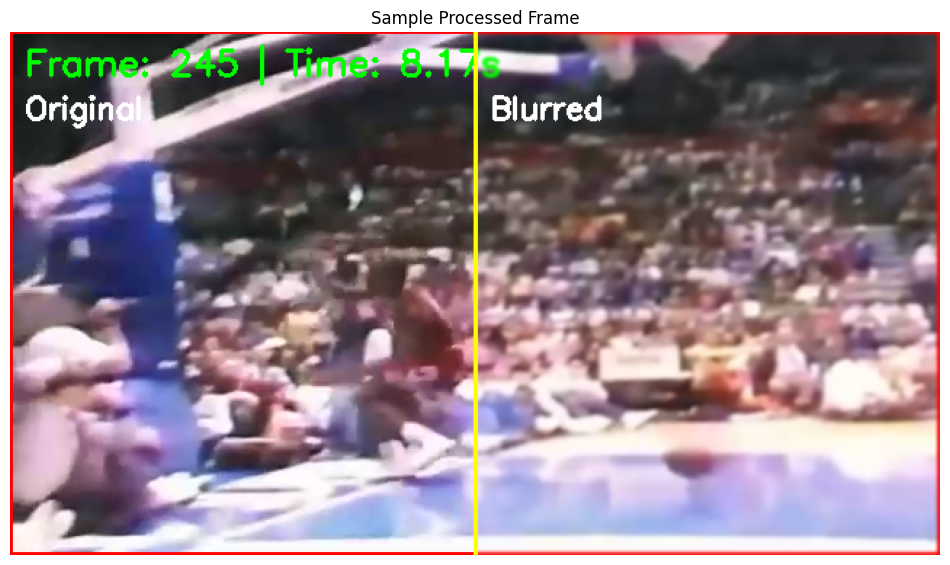

In [4]:
# Define the input video path
video_path = "../Visuals/Main.mp4"

# Create a VideoCapture object
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    print(f"Video Properties:")
    print(f"Width: {frame_width}, Height: {frame_height}")
    print(f"FPS: {fps}")
    print(f"Total Frames: {total_frames}")
    print(f"Duration: {total_frames/fps:.2f} seconds")
    
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    output_path = "output_part1.avi"
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))
    
    # Process the video
    frame_count = 0
    start_time = time.time()
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break
        
        # Apply transformations:
        # 1. Add a timestamp
        timestamp = f"Frame: {frame_count} | Time: {frame_count/fps:.2f}s"
        cv2.putText(frame, timestamp, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.8, (0, 255, 0), 2)
        
        # 2. Add a border
        frame = cv2.rectangle(frame, (0, 0), (frame_width-1, frame_height-1), 
                             (0, 0, 255), 2)
        
        # 3. Apply a slight blur for demonstration
        blurred = cv2.GaussianBlur(frame, (5, 5), 0)
        
        # 4. Create a split-screen effect: original on left, blurred on right
        combined = frame.copy()
        mid_point = frame_width // 2
        combined[:, mid_point:] = blurred[:, mid_point:]
        
        # Add a dividing line
        cv2.line(combined, (mid_point, 0), (mid_point, frame_height), (0, 255, 255), 2)
        
        # Add labels
        cv2.putText(combined, "Original", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.7, (255, 255, 255), 2)
        cv2.putText(combined, "Blurred", (mid_point + 10, 60), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.7, (255, 255, 255), 2)
        
        # Write the frame to the output video
        out.write(combined)
        
        # Display progress
        if frame_count % 30 == 0:
            print(f"Processed {frame_count}/{total_frames} frames ({frame_count/total_frames*100:.1f}%)")
        
        frame_count += 1
    
    # Calculate processing time
    elapsed_time = time.time() - start_time
    print(f"Processing completed in {elapsed_time:.2f} seconds")
    print(f"Average processing speed: {frame_count/elapsed_time:.2f} frames per second")
    
    # Release resources
    cap.release()
    out.release()
    
    print(f"Output video saved to: {output_path}")
    
    # Display a sample frame (we'll use the last processed frame)
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
    plt.title("Sample Processed Frame")
    plt.axis('off')
    plt.show()

## Part 2: Motion Detection Application with Foreground Mass and Erosion

**Requirements:**

- **Input:** Use a video clip (less than one minute long) that shows some movement.
- **Processing:**
    - Create a **background model** from the initial frames.
    - Compute the **foreground mass** by taking the difference between the current frame and the background model.
    - Apply **erosion** to the foreground mask to remove noise (explain how erosion removes small, isolated noise pixels).
- **Output:** Annotate the frames (e.g., draw bounding boxes around detected motion areas) and write the output to a new video file.

**Instructions:**

1. **Background Modeling & Foreground Mass:**
2. **Applying Erosion:**
3. **Annotation and Video Output:**
    - Draw bounding rectangles (or other markers) around the regions of motion detected in the eroded foreground mask.
    - Write the annotated frames to a new output video.
    
Bonus: You can include intermediate visualizations (e.g., display the raw foreground mask vs. the eroded mask) to show the effect of erosion.

Processed 30 frames
Processed 60 frames
Processed 90 frames
Processed 120 frames
Processed 150 frames
Processed 180 frames
Processed 210 frames
Processed 240 frames
Output video saved to: output_part2.avi


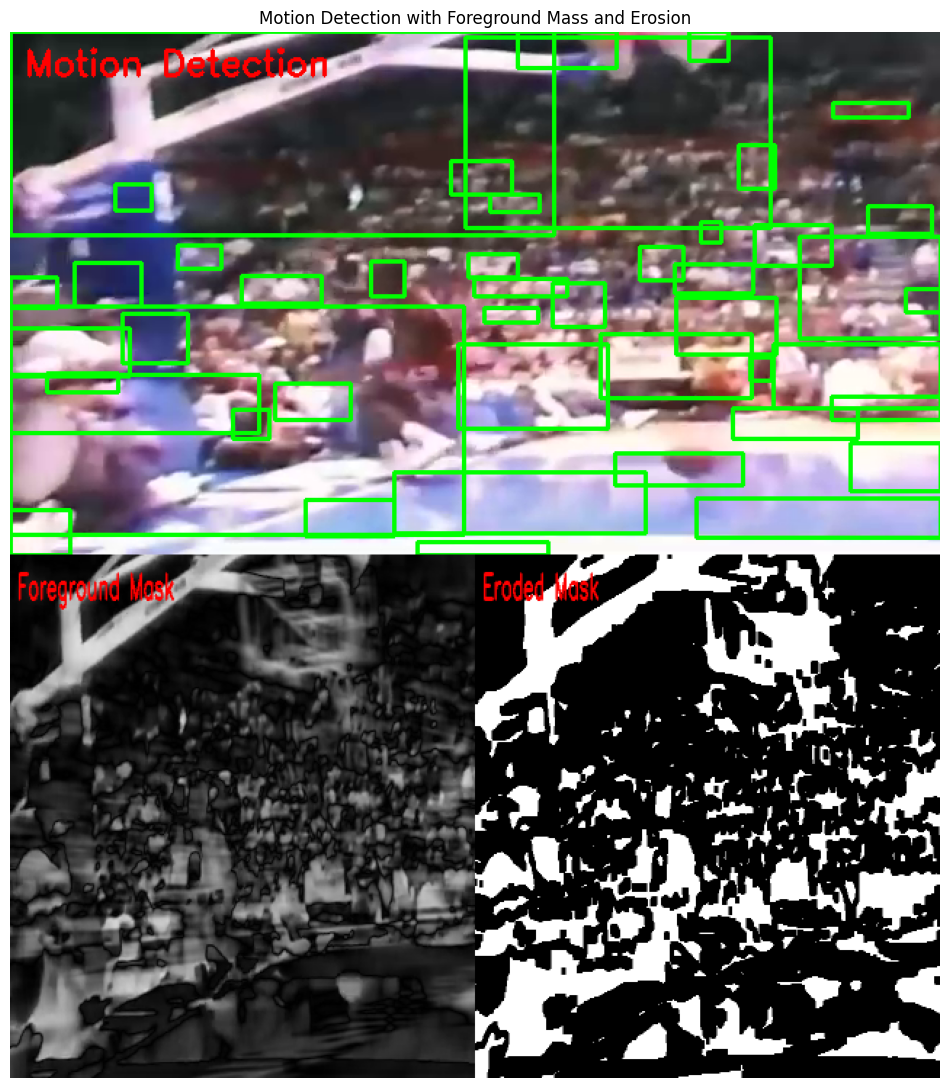

In [5]:
# Define the input video path
video_path = "../Visuals/Main.mp4"

# Create a VideoCapture object
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    output_path = "output_part2.avi"
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height*2))
    
    # Initialize variables for background subtraction
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read first frame.")
    else:
        # Convert to grayscale for background modeling
        prev_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Create a background model by averaging the first few frames
        num_bg_frames = 10
        bg_model = np.zeros_like(prev_gray, dtype=np.float32)
        
        for i in range(num_bg_frames):
            ret, frame = cap.read()
            if not ret:
                break
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            bg_model += gray / num_bg_frames
        
        # Convert background model to uint8
        bg_model = bg_model.astype(np.uint8)
        
        # Reset video to beginning
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        
        # Process the video
        frame_count = 0
        
        # Create a kernel for erosion
        kernel = np.ones((5, 5), np.uint8)
        
        while cap.isOpened():
            ret, frame = cap.read()
            
            if not ret:
                break
            
            # Convert current frame to grayscale
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            
            # Compute foreground mask (difference between current frame and background)
            foreground_mask = cv2.absdiff(gray, bg_model)
            
            # Apply threshold to get binary mask
            _, thresh = cv2.threshold(foreground_mask, 30, 255, cv2.THRESH_BINARY)
            
            # Apply erosion to remove noise
            eroded_mask = cv2.erode(thresh, kernel, iterations=1)
            
            # Find contours in the eroded mask
            contours, _ = cv2.findContours(eroded_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            # Create a copy of the original frame for drawing
            result_frame = frame.copy()
            
            # Draw bounding boxes around detected motion areas
            for contour in contours:
                # Filter out small contours
                if cv2.contourArea(contour) > 100:
                    x, y, w, h = cv2.boundingRect(contour)
                    cv2.rectangle(result_frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            
            # Add text to explain what's happening
            cv2.putText(result_frame, "Motion Detection", (10, 30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
            
            # Create visualization of masks
            # Convert masks to 3-channel for display
            foreground_mask_color = cv2.cvtColor(foreground_mask, cv2.COLOR_GRAY2BGR)
            eroded_mask_color = cv2.cvtColor(eroded_mask, cv2.COLOR_GRAY2BGR)
            
            # Add labels to the masks
            cv2.putText(foreground_mask_color, "Foreground Mask", (10, 30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
            cv2.putText(eroded_mask_color, "Eroded Mask", (10, 30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
            
            # Create a split view: top half shows original with bounding boxes, 
            # bottom half shows masks side by side
            masks_combined = np.hstack((foreground_mask_color, eroded_mask_color))
            
            # Resize if necessary to match frame width
            if masks_combined.shape[1] != frame_width:
                masks_combined = cv2.resize(masks_combined, (frame_width, frame_height))
            
            # Stack the result frame and masks vertically
            output_frame = np.vstack((result_frame, masks_combined))
            
            # Write the frame to the output video
            out.write(output_frame)
            
            # Update frame count
            frame_count += 1
            
            # Display progress
            if frame_count % 30 == 0:
                print(f"Processed {frame_count} frames")
        
        # Release resources
        cap.release()
        out.release()
        
        print(f"Output video saved to: {output_path}")
        
        # Display the last output frame
        plt.figure(figsize=(12, 16))
        plt.imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
        plt.title("Motion Detection with Foreground Mass and Erosion")
        plt.axis('off')
        plt.show()

## Part 3: Contour Detection Application

**Requirements:**

 - **Input:** Use an image that contains distinct shapes (or create one with simple geometric shapes).
 - **Processing:**
    - Convert the image to grayscale and threshold it to create a binary image.
    - Use cv2.findContours to detect the contours.
    - Use cv2.drawContours to overlay the detected contours on the original image.
- **Output:** Display the resulting image with contours drawn.
- **Bonus:** Extend your code to process a video stream frame-by-frame, drawing contours on each frame.

**Instructions:**

1. **Image Preprocessing:**
    - Load the image and convert it to grayscale.
    - Apply a binary threshold to segment the shapes.
2. **Contour Detection:**
    - Use cv2.findContours with appropriate retrieval and approximation modes.
    - Explain the output: a list of contours and (optionally) a hierarchy that indicates relationships between contours.
3. **Drawing the Contours:**
    - Use cv2.drawContours to overlay the detected contours onto the image.
    - Display the final image.
4. **(Bonus) Video Contour Detection:**
    - Modify your code from Part 1 to process a video.
    - For each frame, detect contours and draw them before writing the frame to an output video file.

Hint: Choose a short video clip (under one minute) to ensure quick processing and review.

Found 59 contours


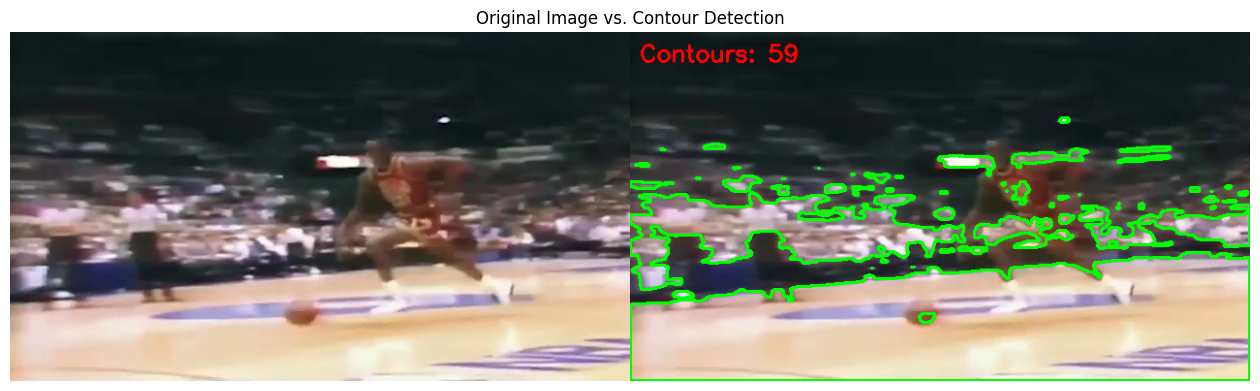

Contour Detection Process:
1. Convert the image to grayscale to simplify processing
2. Apply Gaussian blur to reduce noise and improve contour detection
3. Apply binary threshold to create a black and white image
4. Find contours using cv2.findContours
5. Draw the contours on the original image

Contour Hierarchy:
The hierarchy describes the relationship between contours.
For each contour, it stores information about:
- Next contour at the same level
- Previous contour at the same level
- First child contour
- Parent contour


In [6]:
# Part 3A: Contour detection on a single frame

# Extract a frame from the video to use as our image
video_path = "../Visuals/Main.mp4"
cap = cv2.VideoCapture(video_path)

# Skip to a frame with interesting content
cap.set(cv2.CAP_PROP_POS_FRAMES, 50)
ret, frame = cap.read()

if not ret:
    print("Error: Could not read frame from video.")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply binary threshold
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    print(f"Found {len(contours)} contours")
    
    # Create a copy of the original frame for drawing
    contour_image = frame.copy()
    
    # Draw all contours
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
    
    # Add text explaining contours
    cv2.putText(contour_image, f"Contours: {len(contours)}", (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    # Create a side-by-side comparison
    comparison = np.hstack((frame, contour_image))
    
    # Display the comparison
    plt.figure(figsize=(16, 8))
    plt.imshow(cv2.cvtColor(comparison, cv2.COLOR_BGR2RGB))
    plt.title("Original Image vs. Contour Detection")
    plt.axis('off')
    plt.show()
    
    # Explanation of the contour detection process
    print("Contour Detection Process:")
    print("1. Convert the image to grayscale to simplify processing")
    print("2. Apply Gaussian blur to reduce noise and improve contour detection")
    print("3. Apply binary threshold to create a black and white image")
    print("4. Find contours using cv2.findContours")
    print("5. Draw the contours on the original image")
    
    # Explanation of the contour hierarchy
    print("\nContour Hierarchy:")
    print("The hierarchy describes the relationship between contours.")
    print("For each contour, it stores information about:")
    print("- Next contour at the same level")
    print("- Previous contour at the same level")
    print("- First child contour")
    print("- Parent contour")

In [7]:
# Part 3B: Bonus - Contour detection on video

# Reset video to beginning
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_path = "output_part3.avi"
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width*2, frame_height))

# Process the video
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply threshold
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a copy for drawing
    contour_frame = frame.copy()
    
    # Draw contours
    cv2.drawContours(contour_frame, contours, -1, (0, 255, 0), 2)
    
    # Add text
    cv2.putText(contour_frame, f"Contours: {len(contours)}", (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    # Create side-by-side view
    output_frame = np.hstack((frame, contour_frame))
    
    # Write to video
    out.write(output_frame)
    
    # Update frame count
    frame_count += 1
    
    # Display progress
    if frame_count % 30 == 0:
        print(f"Processed {frame_count} frames")

# Release resources
cap.release()
out.release()

print(f"Output video saved to: {output_path}")

Processed 30 frames
Processed 60 frames
Processed 90 frames
Processed 120 frames
Processed 150 frames
Processed 180 frames
Processed 210 frames
Processed 240 frames
Output video saved to: output_part3.avi
